In [1]:
## 코렙 드라이브 마운트합니다.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/data/img

/content/drive/MyDrive/data/img


## 모델에 사용될 이미지 전처리
- h5모델 제작할때와 같은 상황을 만들어야 함
- 이번 작업에서는 아래의 작업을 하기전에 숫자3개를 나누어야 함.
- h5모델에 들어간 x자료의 특징
  1. 사이즈는 28*28
  2. 그레이스케일이다(2차원)
  3. 배경이 어둡고 내용이 밝다
  4. 0~1사이다(/255)
  5. 28*28을 (1, 784)로 변경하였다.



In [27]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# 단순한 모듈로 시작 PIL
# 이미지 관련 모듈은 대표적으로 PIL과 openCV가 있음
from PIL import  Image

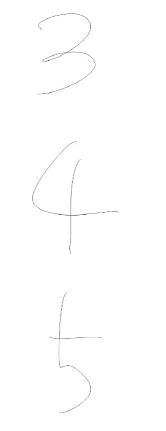

In [4]:
img = Image.open('number.png')
img

In [7]:
# 이미지의 크기 확인
img.size
# PIL로 부른 파일의 size 결과는 (가로크기, 세로크기) = (열, 행)
# np.shape로 변환하면 행 열로 보임 (431, 166)

(166, 431)

In [9]:
np.shape(img)
# (431, 166, 3) > 한개자료만 읽었는데 1, 2, 3까지 나오면 행, 열 채널갯수 -> 채널갯수가 3은 컬러임 3=흑백을 의미

(431, 166, 3)

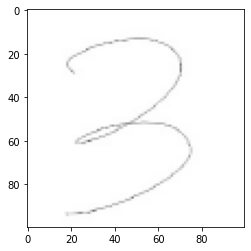

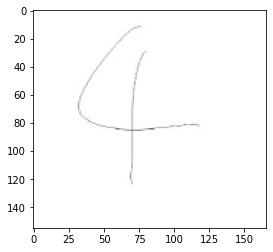

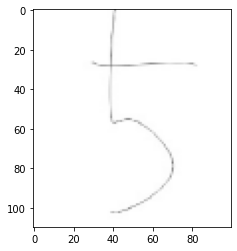

In [163]:
# image crop 'PILLOW에서 그림자르기' 와 같이 구글에서 검색하기
# img.crop(start left, start up, end right, end down)
# img.crop(시작열, 시작행, 끝 열, 끝행)
img1 = img.crop((20,0,120,100))
plt.imshow(np.array(img1))
plt.show()

img2 = img.crop((0,130,166,285))
plt.imshow(np.array(img2))
plt.show()

img3 = img.crop((20,310,120,420))
plt.imshow(np.array(img3))

- h5모델에 들어간 x자료의 특징
1. 사이즈는 28*28
2. 그레이스케일이다(2차원)
3. 배경이 어둡고 내용이 밝다
4. 0~1사이다(/255)
5. 28*28을 (1, 784)로 변경하였다.

In [164]:
# plt.imshow에 들어가는 자료는 반드시 색상숫자값이어야 함. 이미지를 숫자로 변경하려면 array로 변경해야함.
# [1] 사이즈 변경 # (가로, 세로)=(열, 행) PIL 규칙을 따름
img_re1 = img2.resize((28,28))

# [2]그레이스케일 변경 ( 회색영역 색보정 : 백색과 흑색의 비율을 변화시킨 색보정)
img_gr1 = img_re1.convert('L') 

# (행, 열) 크기 확인(np는 행열)
np.shape(img_gr1)             

(28, 28)

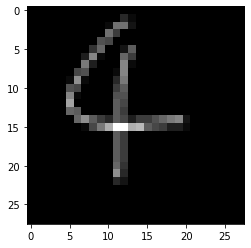

In [165]:
# [3]이미지 반전
import PIL.ImageOps
img_con_1 = PIL.ImageOps.invert(img_gr1)   # 이미지 반전 (글씨를 하얗게 배경을 검정으로)
plt.imshow(np.array(img_con_1), cmap='gray')

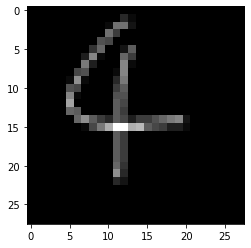

In [166]:
# [4] 0~1사이값이다. (모델링 작업에서한 스케일링과 똑같이 해야 함.)
img_sc_1 = np.array(img_con_1)/255
plt.imshow(img_sc_1, cmap='gray') #스케일링된 자료는 plt.imshow() 가능

In [167]:
# [5] 28*28을 (1,784)로 변경
img_re_1 = img_sc_1.reshape(1, -1) # 1,784 와 동일
img_re_1.shape


(1, 784)

## 숫자인식하는 h5모델을 불러오고 그 모델에 img_re_1을 넣어서 예측을 해보려 함.

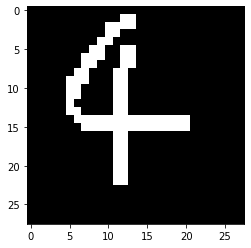

In [168]:
## 이미지를 명확하게 하는 방법론 1
tmp = img_re_1
for cnt in range(len(tmp[0])):
  if tmp[0][cnt] != 0:
    tmp[0][cnt] = 1.0

plt.imshow(tmp.reshape(28,28), cmap='gray')

In [135]:
# 이전에 만들어둔 모델 불러오기
import tensorflow as tf
load_model = tf.keras.models.load_model('my_mnist.h5')
load_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [169]:
result = load_model.predict(img_re_1)
result    
# 모델작성할때 최종 레이어의 dense의 유닛 갯수가 10개(y_train 값의 unique갯수와 같음.)여서 그 10개에 각각의 비중이 출력됨

array([[1.8418793e-11, 1.1492033e-14, 9.9251900e-12, 7.1348621e-14,
        7.8529433e-11, 2.7048860e-15, 9.9999988e-01, 2.8853906e-14,
        1.7441161e-07, 2.0578542e-16]], dtype=float32)

In [170]:
np.sum(result)
# 0~9 까지 의 예측율이 나와 전부 합치면 1이 됨

1.0

In [171]:
print(np.argmax(result))
# 가장 유력한 값 확인

6


In [172]:
# tmp로 확인(숫자를 명확하게 한것)
result=load_model.predict(tmp)
np.argmax(result)

6